### A certain food-based company conducted a survey with the help of a fitness company to find the relationship between a person’s weight gain and the number of calories they consumed in order to come up with diet plans for these individuals. Build a Simple Linear Regression model with calories consumed as the target variable. Apply necessary transformations and record the RMSE and correlation coefficient values for different models. 

C:\Users\tarun\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


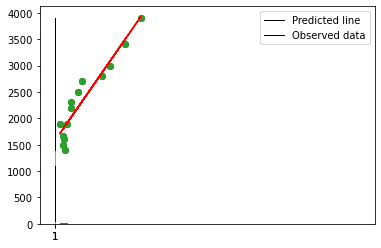

C:\Users\tarun\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


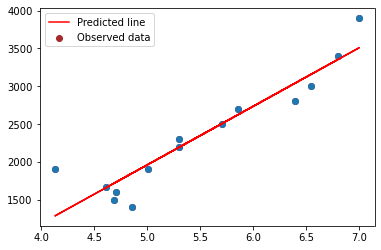

C:\Users\tarun\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


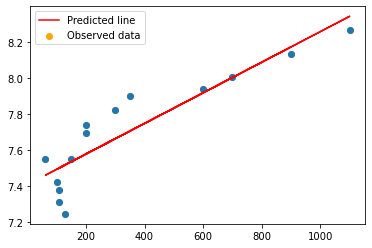

C:\Users\tarun\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


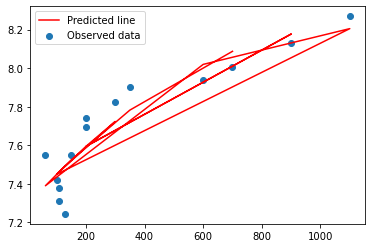

C:\Users\tarun\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


178.88069557844116

In [7]:
# Importing necessary libraries
import pandas as pd # deals with data frame  
import numpy as np  # deals with numerical values

food = pd.read_csv(r'C:\Users\tarun\Documents\taruns imp\Data science material\assignments\SETS\Simple linear regression\calories_consumed.csv')
# Exploratory data analysis:
# 1. Measures of central tendency
# 2. Measures of dispersion
# 3. Third moment business decision
# 4. Fourth moment business decision
# 5. Probability distributions of variables 
# 6. Graphical representations (Histogram, Box plot, Dot plot, Stem & Leaf plot, Bar plot, etc.)

food.describe()
food.columns
food.rename(columns= {'Weight gained (grams)':'weight', 'Calories Consumed' : 'calories' },inplace=True)
food.columns
#Graphical Representation
import matplotlib.pyplot as plt # mostly used for visualization purposes 

plt.bar(height = food.weight, x = np.arange(0, 14, 1))
plt.hist(food.weight) #histogram
plt.boxplot(food.weight) #boxplot

plt.bar(height = food.calories, x = np.arange(0, 14, 1))
plt.hist(food.calories) #histogram
plt.boxplot(food.calories) #boxplot

# Scatter plot
plt.scatter(x = food['weight'], y = food['calories'], color = 'green') 

# correlation
np.corrcoef(food.weight , food.calories) 

# Covariance
# NumPy does not have a function to calculate the covariance between two variables directly. 
# Function for calculating a covariance matrix called cov() 
# By default, the cov() function will calculate the unbiased or sample covariance between the provided random variables.

cov_output = np.cov(food.weight, food.calories)[0, 1]
cov_output

# Import library
import statsmodels.formula.api as smf

# Simple Linear Regression
model = smf.ols('calories ~ weight', data = food).fit()
model.summary()

pred1 = model.predict(pd.DataFrame(food['weight']))

# Regression Line
plt.scatter(food.weight,food.calories)
plt.plot(food.weight, pred1, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

# Error calculation
res1 = food.calories - pred1
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

######### Model building on Transformed Data
# Log Transformation

plt.scatter(x = np.log(food['weight']), y = food['calories'], color = 'brown')
np.corrcoef(np.log(food.weight), food.calories) #correlation

model2 = smf.ols('calories ~ np.log(weight)', data = food).fit()
model2.summary()

pred2 = model2.predict(pd.DataFrame(food['weight']))

# Regression Line
plt.scatter(np.log(food.weight), food.calories)
plt.plot(np.log(food.weight), pred2, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

# Error calculation
res2 = food.calories - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2
#### Exponential transformation

plt.scatter(x = food['weight'], y = np.log(food['calories']), color = 'orange')
np.corrcoef(food.weight, np.log(food.calories)) #correlation

model3 = smf.ols('np.log(calories) ~ weight', data = food).fit()
model3.summary()

pred3 = model3.predict(pd.DataFrame(food['weight']))
pred3_at = np.exp(pred3)
pred3_at

# Regression Line
plt.scatter(food.weight, np.log(food.calories))
plt.plot(food.weight, pred3, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

# Error calculation
res3 = food.calories - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3
#### Polynomial transformation

model4 = smf.ols('np.log(calories) ~ weight + I(weight*weight)', data = food).fit()
model4.summary()

pred4 = model4.predict(pd.DataFrame(food.weight))
pred4_at = np.exp(pred4)
pred4_at

# Regression line
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = food.iloc[:, 0:1].values
X_poly = poly_reg.fit_transform(X)

plt.scatter(food.weight, np.log(food.calories))
plt.plot(X, pred4, color = 'red')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

# Error calculation
res4 = food.calories - pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

# Choose the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse

###################
# The best model
from sklearn.model_selection import train_test_split

train, test = train_test_split(food, test_size = 0.2)

finalmodel = smf.ols('np.log(calories) ~ weight + I(weight*weight)', data = train).fit()
finalmodel.summary()

# Predict on test data
test_pred = finalmodel.predict(pd.DataFrame(test))
pred_test_AT = np.exp(test_pred)
pred_test_AT

# Model Evaluation on Test data
test_res = test.calories - pred_test_AT
test_sqrs = test_res * test_res
test_mse = np.mean(test_sqrs)
test_rmse = np.sqrt(test_mse)
test_rmse

# Prediction on train data
train_pred = finalmodel.predict(pd.DataFrame(train))
pred_train_AT = np.exp(train_pred)
pred_train_AT

# Model Evaluation on train data
train_res = train.calories - pred_train_AT
train_sqrs = train_res * train_res
train_mse = np.mean(train_sqrs)
train_rmse = np.sqrt(train_mse)
train_rmse


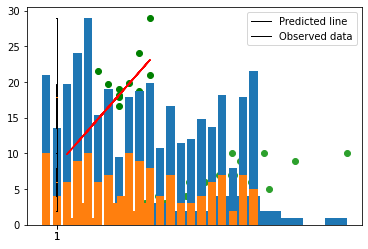

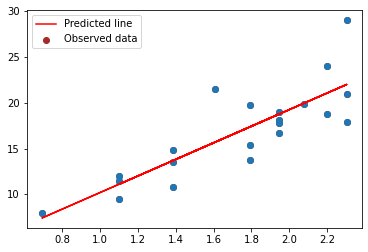

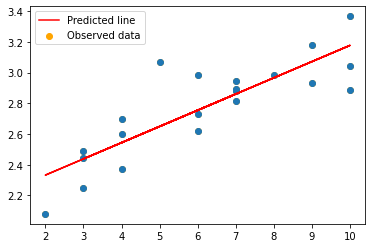

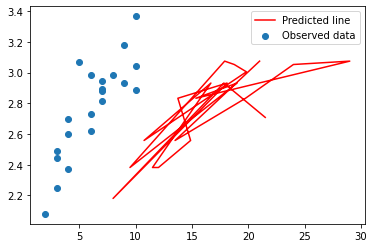

C:\Users\tarun\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


2.7035221018153592

In [5]:
#Problem Statement: -
#2)A food delivery service recorded the data of  delivery time taken and the time taken for the deliveries to be sorted by the restaurants in order to improve their delivery services. Approach – A Simple Linear regression model needs to be built with target variable ‘Delivery.Time’. Apply necessary transformations and record the RMSE values, Correlation coefficient values for different transformation models.
#Answer ;- 
df = pd.read_csv(r'C:\Users\tarun\Documents\taruns imp\Data science material\assignments\SETS\Simple linear regression\delivery_time.csv')
# Exploratory data analysis:
# 1. Measures of central tendency
# 2. Measures of dispersion
# 3. Third moment business decision
# 4. Fourth moment business decision
# 5. Probability distributions of variables 
# 6. Graphical representations (Histogram, Box plot, Dot plot, Stem & Leaf plot, Bar plot, etc.)

df.describe()
df.columns
df.rename(columns= {'Delivery Time':'delivery', 'Sorting Time' : 'sorting' },inplace=True)
df.columns
#Graphical Representation
import matplotlib.pyplot as plt # mostly used for visualization purposes 

plt.bar(height = df.delivery, x = np.arange(0, 21, 1))
plt.hist(df.delivery) #histogram
plt.boxplot(df.delivery) #boxplot

plt.bar(height = df.sorting, x = np.arange(0, 21, 1))
plt.hist(df.sorting) #histogram
plt.boxplot(df.sorting) #boxplot

# Scatter plot
plt.scatter(x = df['sorting'], y = df['delivery'], color = 'green') 

# correlation
np.corrcoef(df.delivery,df.sorting) 

# Covariance
# NumPy does not have a function to calculate the covariance between two variables directly. 
# Function for calculating a covariance matrix called cov() 
# By default, the cov() function will calculate the unbiased or sample covariance between the provided random variables.

cov_output = np.cov(df.delivery,df.sorting)[0, 1]
cov_output

# Import library
import statsmodels.formula.api as smf

# Simple Linear Regression
model = smf.ols('delivery ~ sorting', data = df).fit()
model.summary()

pred1 = model.predict(pd.DataFrame(df['sorting']))

# Regression Line
plt.scatter(df.delivery,df.sorting)
plt.plot(df.sorting, pred1, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

# Error calculation
res1 = df.delivery - pred1
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

######### Model building on Transformed Data
# Log Transformation

plt.scatter(x = np.log(df['sorting']), y = df['delivery'], color = 'brown')
np.corrcoef(np.log(df.sorting), df.delivery) #correlation

model2 = smf.ols('delivery ~ np.log(sorting)', data = df).fit()
model2.summary()

pred2 = model2.predict(pd.DataFrame(df['sorting']))

# Regression Line
plt.scatter(np.log(df.sorting), df.delivery)
plt.plot(np.log(df.sorting), pred2, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

# Error calculation
res2 = df.delivery - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2
#### Exponential transformation

plt.scatter(x = df['sorting'], y = np.log(df['delivery']), color = 'orange')
np.corrcoef(df.sorting, np.log(df.delivery)) #correlation

model3 = smf.ols('np.log(delivery) ~ sorting', data = df).fit()
model3.summary()

pred3 = model3.predict(pd.DataFrame(df['sorting']))
pred3_at = np.exp(pred3)
pred3_at

# Regression Line
plt.scatter(df.sorting, np.log(df.delivery))
plt.plot(df.sorting, pred3, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

# Error calculation
res3 = df.delivery - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3
#### Polynomial transformation

model4 = smf.ols('np.log(delivery) ~ sorting + I(sorting*sorting)', data = df).fit()
model4.summary()

pred4 = model4.predict(pd.DataFrame(df.sorting))
pred4_at = np.exp(pred4)
pred4_at

# Regression line
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = df.iloc[:, 0:1].values
X_poly = poly_reg.fit_transform(X)

plt.scatter(df.sorting, np.log(df.delivery))
plt.plot(X, pred4, color = 'red')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

# Error calculation
res4 = df.delivery - pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

# Choose the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse

###################
# The best model
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2)

finalmodel = smf.ols('np.log(delivery) ~ sorting + I(sorting*sorting)', data = train).fit()
finalmodel.summary()

# Predict on test data
test_pred = finalmodel.predict(pd.DataFrame(test))
pred_test_AT = np.exp(test_pred)
pred_test_AT

# Model Evaluation on Test data
test_res = test.delivery - pred_test_AT
test_sqrs = test_res * test_res
test_mse = np.mean(test_sqrs)
test_rmse = np.sqrt(test_mse)
test_rmse

# Prediction on train data
train_pred = finalmodel.predict(pd.DataFrame(train))
pred_train_AT = np.exp(train_pred)
pred_train_AT

# Model Evaluation on train data
train_res = train.delivery - pred_train_AT
train_sqrs = train_res * train_res
train_mse = np.mean(train_sqrs)
train_rmse = np.sqrt(train_mse)
train_rmse

C:\Users\tarun\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


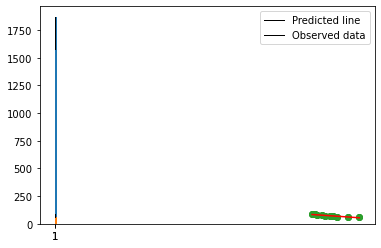

KeyError: 'hike'

In [7]:
#Problem Statement: -
#3)A certain organization wanted an early estimate of their employee churn out rate. So, the HR department came up with data regarding the employee’s salary hike and churn out rate for a financial year. The analytics team will have to perform a deep analysis and predict an estimate of employee churn and present the statistics. Approach –A Simple Linear regression model needs to be built with target variable ‘Churn_out_rate’. Apply necessary transformations and record the RMSE values, Correlation coefficient values for different transformation models.
#Answer;-
emp = pd.read_csv(r"C:\Users\tarun\Documents\taruns imp\Data science material\assignments\SETS\Simple linear regression\emp_data.csv")
# Exploratory data analysis:
# 1. Measures of central tendency
# 2. Measures of dispersion
# 3. Third moment business decision
# 4. Fourth moment business decision
# 5. Probability distributions of variables 
# 6. Graphical representations (Histogram, Box plot, Dot plot, Stem & Leaf plot, Bar plot, etc.)

emp.describe()
emp.columns
emp.rename(columns= {'Salary_hike':'hike', 'Churn_out_rate' : 'rate' },inplace=True)
emp.columns
#Graphical Representation
import matplotlib.pyplot as plt # mostly used for visualization purposes 

plt.bar(height = emp.hike, x = np.arange(0, 10, 1))
plt.hist(emp.hike) #histogram
plt.boxplot(emp.hike) #boxplot

plt.bar(height = emp.rate, x = np.arange(0, 10, 1))
plt.hist(emp.rate) #histogram
plt.boxplot(emp.rate) #boxplot

# Scatter plot
plt.scatter(x = emp['hike'], y = emp['rate'], color = 'green') 

# correlation
np.corrcoef(emp.hike,emp.rate) 

# Covariance
# NumPy does not have a function to calculate the covariance between two variables directly. 
# Function for calculating a covariance matrix called cov() 
# By default, the cov() function will calculate the unbiased or sample covariance between the provided random variables.

cov_output = np.cov(emp.hike,emp.rate)[0, 1]
cov_output

# Import library
import statsmodels.formula.api as smf

# Simple Linear Regression
model = smf.ols('rate ~ hike', data = emp).fit()
model.summary()

pred1 = model.predict(pd.DataFrame(emp['hike']))

# Regression Line
plt.scatter(emp.hike,emp.rate)
plt.plot(emp.hike, pred1, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

# Error calculation
res1 = emp.rate - pred1
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

######### Model building on Transformed Data
# Log Transformation

plt.scatter(x = np.log(df['hike']), y = df['rate'], color = 'brown')
np.corrcoef(np.log(emp.hike), emp.rate) #correlation

model2 = smf.ols('rate ~ np.log(hike)', data = emp).fit()
model2.summary()

pred2 = model2.predict(pd.DataFrame(emp['hike']))

# Regression Line
plt.scatter(np.log(emp.hike), emp.rate)
plt.plot(np.log(emp.hike), pred2, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

# Error calculation
res2 = emp.rate - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2
#### Exponential transformation

plt.scatter(x = emp['hike'], y = np.log(emp['rate']), color = 'orange')
np.corrcoef(emp.hike, np.log(emp.rate)) #correlation

model3 = smf.ols('np.log(rate) ~ hike', data = emp).fit()
model3.summary()

pred3 = model3.predict(pd.DataFrame(emp['hike']))
pred3_at = np.exp(pred3)
pred3_at

# Regression Line
plt.scatter(emp.hike, np.log(emp.rate))
plt.plot(emp.hike, pred3, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

# Error calculation
res3 = emp.rate - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3
#### Polynomial transformation

model4 = smf.ols('np.log(rate) ~ hike + I(hike*hike)', data = emp).fit()
model4.summary()

pred4 = model4.predict(pd.DataFrame(emp.hike))
pred4_at = np.exp(pred4)
pred4_at

# Regression line
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = emp.iloc[:, 0:1].values
X_poly = poly_reg.fit_transform(X)

plt.scatter(emp.hike, np.log(emp.rate))
plt.plot(X, pred4, color = 'red')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

# Error calculation
res4 = emp.rate - pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

# Choose the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse

###################
# The best model
from sklearn.model_selection import train_test_split

train, test = train_test_split(emp, test_size = 0.2)

finalmodel = smf.ols('np.log(rate) ~ hike + I(hike*hike)', data = train).fit()
finalmodel.summary()

# Predict on test data
test_pred = finalmodel.predict(pd.DataFrame(test))
pred_test_AT = np.exp(test_pred)
pred_test_AT

# Model Evaluation on Test data
test_res = test.rate - pred_test_AT
test_sqrs = test_res * test_res
test_mse = np.mean(test_sqrs)
test_rmse = np.sqrt(test_mse)
test_rmse

# Prediction on train data
train_pred = finalmodel.predict(pd.DataFrame(train))
pred_train_AT = np.exp(train_pred)
pred_train_AT

# Model Evaluation on train data
train_res = train.rate - pred_train_AT
train_sqrs = train_res * train_res
train_mse = np.mean(train_sqrs)
train_rmse = np.sqrt(train_mse)
train_rmse

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'year' is not defined
    Salary ~ year
             ^^^^

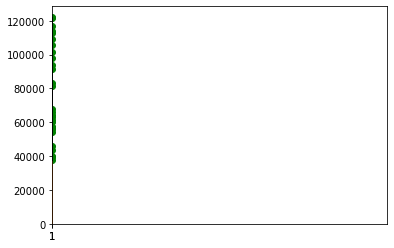

In [9]:
#Problem Statement: -
#4)The Head HR of a certain organization wants to automate their salary hike estimation. The organization consulted an analytics service provider and asked them to build a basic prediction model by providing them with a sample data that contains historic data of the years of experience and the salary hike given accordingly over the past years. Approach - A Simple Linear regression model needs to be built with target variable ‘Salary’ to predict the salary hikeapply necessary transformations and record the RMSE values, Correlation coefficient values for different transformation models.
#Answer ;- 
df = pd.read_csv(r"C:\Users\tarun\Documents\taruns imp\Data science material\assignments\SETS\Simple linear regression\Salary_Data.csv")
# Exploratory data analysis:
# 1. Measures of central tendency
# 2. Measures of dispersion
# 3. Third moment business decision
# 4. Fourth moment business decision
# 5. Probability distributions of variables 
# 6. Graphical representations (Histogram, Box plot, Dot plot, Stem & Leaf plot, Bar plot, etc.)

df.describe()
df.columns
df.rename(columns= {'YearsExperience':'year', ' Salary' : 'salary' },inplace=True)
df.columns
#Graphical Representation
import matplotlib.pyplot as plt # mostly used for visualization purposes 

plt.bar(height = df.year, x = np.arange(0, 30, 1))
plt.hist(df.year) #histogram
plt.boxplot(df.year) #boxplot

plt.bar(height = df.Salary, x = np.arange(0, 30, 1))
plt.hist(df.Salary) #histogram
plt.boxplot(df.Salary) #boxplot

# Scatter plot
plt.scatter(x = df['year'], y = df['Salary'], color = 'green') 

# correlation
np.corrcoef(df.year,df.Salary) 

# Covariance
# NumPy does not have a function to calculate the covariance between two variables directly. 
# Function for calculating a covariance matrix called cov() 
# By default, the cov() function will calculate the unbiased or sample covariance between the provided random variables.

cov_output = np.cov(df.year,df.Salary)[0, 1]
cov_output

# Import library
import statsmodels.formula.api as smf

# Simple Linear Regression
model = smf.ols('Salary ~ year', data = df).fit()
model.summary()

pred1 = model.predict(pd.DataFrame(df['Salary']))

# Regression Line
plt.scatter(df.Salary,df.year)
plt.plot(df.year, pred1, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

# Error calculation
res1 = df.Salary - pred1
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

######### Model building on Transformed Data
# Log Transformation

plt.scatter(x = np.log(df['year']), y = df['Salary'], color = 'brown')
np.corrcoef(np.log(df.year), df.Salary) #correlation

model2 = smf.ols('Salary ~ np.log(year)', data = df).fit()
model2.summary()

pred2 = model2.predict(pd.DataFrame(df['year']))

# Regression Line
plt.scatter(np.log(df.year), df.Salary)
plt.plot(np.log(df.year), pred2, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

# Error calculation
res2 = df.Salary - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2
#### Exponential transformation

plt.scatter(x = df['year'], y = np.log(df['Salary']), color = 'orange')
np.corrcoef(df.year, np.log(df.Salary)) #correlation

model3 = smf.ols('np.log(Salary) ~ year', data = df).fit()
model3.summary()

pred3 = model3.predict(pd.DataFrame(df['year']))
pred3_at = np.exp(pred3)
pred3_at

# Regression Line
plt.scatter(df.year, np.log(df.Salary))
plt.plot(df.year, pred3, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

# Error calculation
res3 = df.Salary - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3
#### Polynomial transformation

model4 = smf.ols('np.log(Salary) ~ year + I(year*year)', data = df).fit()
model4.summary()

pred4 = model4.predict(pd.DataFrame(df.year))
pred4_at = np.exp(pred4)
pred4_at

# Regression line
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = df.iloc[:, 0:1].values
X_poly = poly_reg.fit_transform(X)

plt.scatter(df.year, np.log(df.Salary))
plt.plot(X, pred4, color = 'red')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

# Error calculation
res4 = df.Salary - pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

# Choose the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse

###################
# The best model
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2)

finalmodel = smf.ols('np.log(Salary) ~ year+ I(year*year)', data = train).fit()
finalmodel.summary()

# Predict on test data
test_pred = finalmodel.predict(pd.DataFrame(test))
pred_test_AT = np.exp(test_pred)
pred_test_AT

# Model Evaluation on Test data
test_res = test.Salary - pred_test_AT
test_sqrs = test_res * test_res
test_mse = np.mean(test_sqrs)
test_rmse = np.sqrt(test_mse)
test_rmse

# Prediction on train data
train_pred = finalmodel.predict(pd.DataFrame(train))
pred_train_AT = np.exp(train_pred)
pred_train_AT

# Model Evaluation on train data
train_res = train.Salary - pred_train_AT
train_sqrs = train_res * train_res
train_mse = np.mean(train_sqrs)
train_rmse = np.sqrt(train_mse)
train_rmse

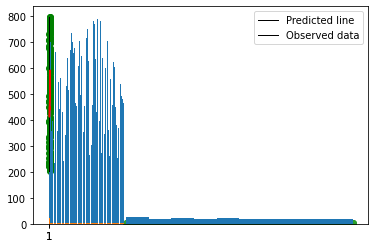

NameError: name 'studen' is not defined

In [8]:
#Problem Statement: -
#5)A student from a certain University was asked to prepare a dataset and build a prediction model for predicting SAT scores based on the exam giver’s GPA. Approach - A regression model needs to be built with target variable ‘SAT_Scores’and record the RMSE values, Correlation coefficient values for different transformation models.
#Answer;-
student = pd.read_csv(r"C:\Users\tarun\Documents\taruns imp\Data science material\assignments\SETS\Simple linear regression\SAT_GPA.csv")
# Exploratory data analysis:
# 1. Measures of central tendency
# 2. Measures of dispersion
# 3. Third moment business decision
# 4. Fourth moment business decision
# 5. Probability distributions of variables 
# 6. Graphical representations (Histogram, Box plot, Dot plot, Stem & Leaf plot, Bar plot, etc.)

student.describe()
student.columns
student.rename(columns= {'SAT_Scores':'score', 'GPA' : 'gpa' },inplace=True)
student.columns
#Graphical Representation
import matplotlib.pyplot as plt # mostly used for visualization purposes 

plt.bar(height = student.score, x = np.arange(0, 200, 1))
plt.hist(student.score) #histogram
plt.boxplot(student.score) #boxplot

plt.bar(height = student.gpa, x = np.arange(0, 200, 1))
plt.hist(student.gpa) #histogram
plt.boxplot(student.gpa) #boxplot

# Scatter plot
plt.scatter(x = student['gpa'], y = student['score'], color = 'green') 

# correlation
np.corrcoef(student.score,student.gpa) 

# Covariance
# NumPy does not have a function to calculate the covariance between two variables directly. 
# Function for calculating a covariance matrix called cov() 
# By default, the cov() function will calculate the unbiased or sample covariance between the provided random variables.

cov_output = np.cov(student.score,student.gpa)[0, 1]
cov_output

# Import library
import statsmodels.formula.api as smf

# Simple Linear Regression
model = smf.ols('score ~ gpa', data = student).fit()
model.summary()

pred1 = model.predict(pd.DataFrame(student['gpa']))

# Regression Line
plt.scatter(student.score,student.gpa)
plt.plot(student.gpa, pred1, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

# Error calculation
res1 = student.score - pred1
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

######### Model building on Transformed Data
# Log Transformation

plt.scatter(x = np.log(studen['gpa']), y = student['score'], color = 'brown')
np.corrcoef(np.log(student.gpa), student.score) #correlation

model2 = smf.ols('score ~ np.log(gpa)', data = student).fit()
model2.summary()

pred2 = model2.predict(pd.DataFrame(student['gpa']))

# Regression Line
plt.scatter(np.log(student.gpa), student.score)
plt.plot(np.log(student.gpa), pred2, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

# Error calculation
res2 = student.score - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2
#### Exponential transformation

plt.scatter(x = student['gpa'], y = np.log(student['score']), color = 'orange')
np.corrcoef(student.gpa, np.log(student.score)) #correlation

model3 = smf.ols('np.log(score) ~ gpa', data = student).fit()
model3.summary()

pred3 = model3.predict(pd.DataFrame(student['gpa']))
pred3_at = np.exp(pred3)
pred3_at

# Regression Line
plt.scatter(student.gpa, np.log(student.score))
plt.plot(student.gpa, pred3, "r")
plt.legend(['Predicted line', 'Observed data'])
plt.show()

# Error calculation
res3 = student.score - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3
#### Polynomial transformation

model4 = smf.ols('np.log(score) ~ gpa + I(gpa*gpa)', data = student).fit()
model4.summary()

pred4 = model4.predict(pd.DataFrame(student.gpa))
pred4_at = np.exp(pred4)
pred4_at

# Regression line
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = student.iloc[:, 0:1].values
X_poly = poly_reg.fit_transform(X)

plt.scatter(student.gpa, np.log(student.score))
plt.plot(X, pred4, color = 'red')
plt.legend(['Predicted line', 'Observed data'])
plt.show()

# Error calculation
res4 = student.score - pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

# Choose the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse

###################
# The best model
from sklearn.model_selection import train_test_split

train, test = train_test_split(student, test_size = 0.2)

finalmodel = smf.ols('np.log(score) ~ gpa + I(gpa*gpa)', data = train).fit()
finalmodel.summary()

# Predict on test data
test_pred = finalmodel.predict(pd.DataFrame(test))
pred_test_AT = np.exp(test_pred)
pred_test_AT

# Model Evaluation on Test data
test_res = test.score - pred_test_AT
test_sqrs = test_res * test_res
test_mse = np.mean(test_sqrs)
test_rmse = np.sqrt(test_mse)
test_rmse

# Prediction on train data
train_pred = finalmodel.predict(pd.DataFrame(train))
pred_train_AT = np.exp(train_pred)
pred_train_AT

# Model Evaluation on train data
train_res = train.score - pred_train_AT
train_sqrs = train_res * train_res
train_mse = np.mean(train_sqrs)
train_rmse = np.sqrt(train_mse)
train_rmse
